# Import Library

In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import squarify
import plotly.express as px
import pycountry_convert as pc

warnings.filterwarnings('ignore')

# CARBON EMISSION

This notebook is purely an exploratory data analysis to see if I can figure out which Countries have highest or Lowest Carbon Emission. To do this, I will be analysing & exploring the data set provided, and the historic carbon emission  from 1995.

I hope to learn a few things along the way, and I hope anyone reading this will, too.

I'll also explore if countries can improve their positions over time, or if the placings are more or less static.



# Load Data


In [3]:
#get data
df = pd.read_csv("../Carbon Dioxide Emission/carbon dioxide.csv")
df_backup=df.copy()
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018
0,1,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.284,0.319,0.338,0.377,0.378,0.369,0.371,0.303,0.358,0.344
1,2,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.725,0.738,0.765,0.777,0.840,0.794,0.852,0.789,0.846,0.857
3,4,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,13.804,14.110,14.616,14.120,15.358,13.728,14.273,13.838,14.121,13.067
4,5,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,2.648,2.989,3.094,3.129,3.327,3.323,3.345,3.435,3.564,3.584


# DATA WRANGLING AND CLEANING

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             8910 non-null   int64  
 1   Country              8910 non-null   object 
 2   ISO2                 8910 non-null   object 
 3   ISO3                 8910 non-null   object 
 4   Indicator            8910 non-null   object 
 5   Unit                 8910 non-null   object 
 6   Source               8910 non-null   object 
 7   CTS_Code             8910 non-null   object 
 8   CTS_Name             8910 non-null   object 
 9   CTS_Full_Descriptor  8910 non-null   object 
 10  Industry             8910 non-null   object 
 11  Scale                8910 non-null   object 
 12  F1995                8910 non-null   float64
 13  F1996                8910 non-null   float64
 14  F1997                8910 non-null   float64
 15  F1998                8910 non-null   f

(8910, 36)

In [5]:
df.duplicated().any()

np.False_

In [6]:
df.isnull().sum()

ObjectId               0
Country                0
ISO2                   0
ISO3                   0
Indicator              0
Unit                   0
Source                 0
CTS_Code               0
CTS_Name               0
CTS_Full_Descriptor    0
Industry               0
Scale                  0
F1995                  0
F1996                  0
F1997                  0
F1998                  0
F1999                  0
F2000                  0
F2001                  0
F2002                  0
F2003                  0
F2004                  0
F2005                  0
F2006                  0
F2007                  0
F2008                  0
F2009                  0
F2010                  0
F2011                  0
F2012                  0
F2013                  0
F2014                  0
F2015                  0
F2016                  0
F2017                  0
F2018                  0
dtype: int64

In [7]:
df.drop(['ObjectId','ISO3'],axis=1,inplace=True)


In [8]:
df.columns

Index(['Country', 'ISO2', 'Indicator', 'Unit', 'Source', 'CTS_Code',
       'CTS_Name', 'CTS_Full_Descriptor', 'Industry', 'Scale', 'F1995',
       'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003',
       'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011',
       'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018'],
      dtype='object')

In [9]:
df['Country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'China, P.R.: Hong Kong', 'China, P.R.: Mainland', 'Colombia',
       'Costa Rica', 'Croatia, Rep. of', 'Cyprus', 'Czech Rep.',
       'Denmark', 'Estonia, Rep. of', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan, Rep. of',
       'Korea, Rep. of', "Lao People's Dem. Rep.", 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Myanmar',
       'Netherlands, The', 'New Zealand', 'Norway', 'Peru', 'Philippines',
       'Poland, Rep. of', 'Portugal', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Singapore', 'Slovak Rep.', 'Slovenia, Rep. of',
       'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan Province of China', 'Thailand', 'Tunisia', 'Turkey',
       'United Kingdom', 'United State

In [10]:
df.describe()

,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,...,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018
count,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,...,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000,8910.000000
mean,642.690767,626.247949,597.889064,634.523417,628.532695,584.815129,581.440616,545.903132,490.212486,422.352039,...,277.552219,255.599049,228.419131,226.670976,219.907381,217.131214,254.947335,300.596451,256.180262,224.472003
std,4630.754009,4370.387146,3440.589143,3472.768617,3072.488297,2403.487481,2405.330851,2168.233614,2003.781611,1735.869105,...,1073.148968,967.957555,885.294193,913.127550,911.191397,800.634281,1154.516988,3413.770262,1516.822242,793.934788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.551750,0.579000,0.574250,0.583250,0.606250,0.672000,0.677000,0.702750,0.747000,0.765500,...,0.831250,0.864750,0.870250,0.895000,0.906250,0.889250,0.905000,0.897750,0.962250,0.975000
50%,51.483010,51.680268,52.319637,54.133453,54.645225,57.685882,59.304477,56.832295,50.775041,44.721861,...,31.513547,29.964705,26.775893,27.436395,26.485056,25.452176,27.371744,27.459369,26.590652,25.698487
75%,342.525963,339.773235,349.418155,358.978451,357.182242,362.076765,363.397858,340.890874,302.102272,259.409260,...,181.621510,170.145047,149.792878,150.786022,146.083990,148.533203,167.667274,167.091640,158.101021,150.373212
max,268619.614800,244816.005900,180811.599800,172174.706800,131047.244200,82288.011300,84204.541120,70922.998900,63207.730870,57965.874820,...,29960.060010,28251.186870,29678.748310,29089.169930,32033.948990,17089.568230,53393.751770,220076.705300,85065.783690,20139.395610


In [11]:
#Group the column to return only one Country value for each year
df1=df.filter(regex='F\d').groupby(df['Country']).sum().reset_index(drop=False)
df1['Total']=df1.sum(axis=1, numeric_only= True)
df1.columns = df1.columns.str.strip('F')
df1.iloc[:,1:]= df1.iloc[:,1:].astype('int64')
df1.tail()

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
61,Tunisia,66564.0,65474.0,71733.0,72509.0,72143.0,79889.0,81536.0,75408.0,64014.0,...,40444.0,38429.0,41289.0,41700.0,44094.0,44547.0,46034.0,48211.0,46644.0,1316681.0
62,Turkey,48522.0,50106.0,50776.0,49826.0,52805.0,55728.0,67305.0,59187.0,48555.0,...,25984.0,24541.0,24283.0,22713.0,24467.0,30850.0,33544.0,34309.0,34996.0,927383.0
63,United Kingdom,34633.0,32517.0,29052.0,29488.0,29299.0,29835.0,31809.0,30571.0,27817.0,...,18855.0,16389.0,16375.0,15622.0,14265.0,15406.0,15664.0,14644.0,13182.0,537177.0
64,United States,65281.0,63058.0,63806.0,63451.0,59294.0,55498.0,51774.0,54945.0,51244.0,...,36534.0,35427.0,33897.0,33202.0,31505.0,31207.0,31467.0,29548.0,27795.0,1077841.0
65,Vietnam,106102.0,95761.0,103476.0,113129.0,106907.0,104802.0,106500.0,112027.0,101537.0,...,66029.0,55494.0,48852.0,45382.0,45884.0,56621.0,58152.0,53479.0,60322.0,1906880.0


# DATA VISUALIZATION

In [12]:
# colours
low_c = '#dd4124'
high_c = '#009473'
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590","#dd4124","#009473"]
plt.rcParams["font.family"] = "monospace"
 

findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.


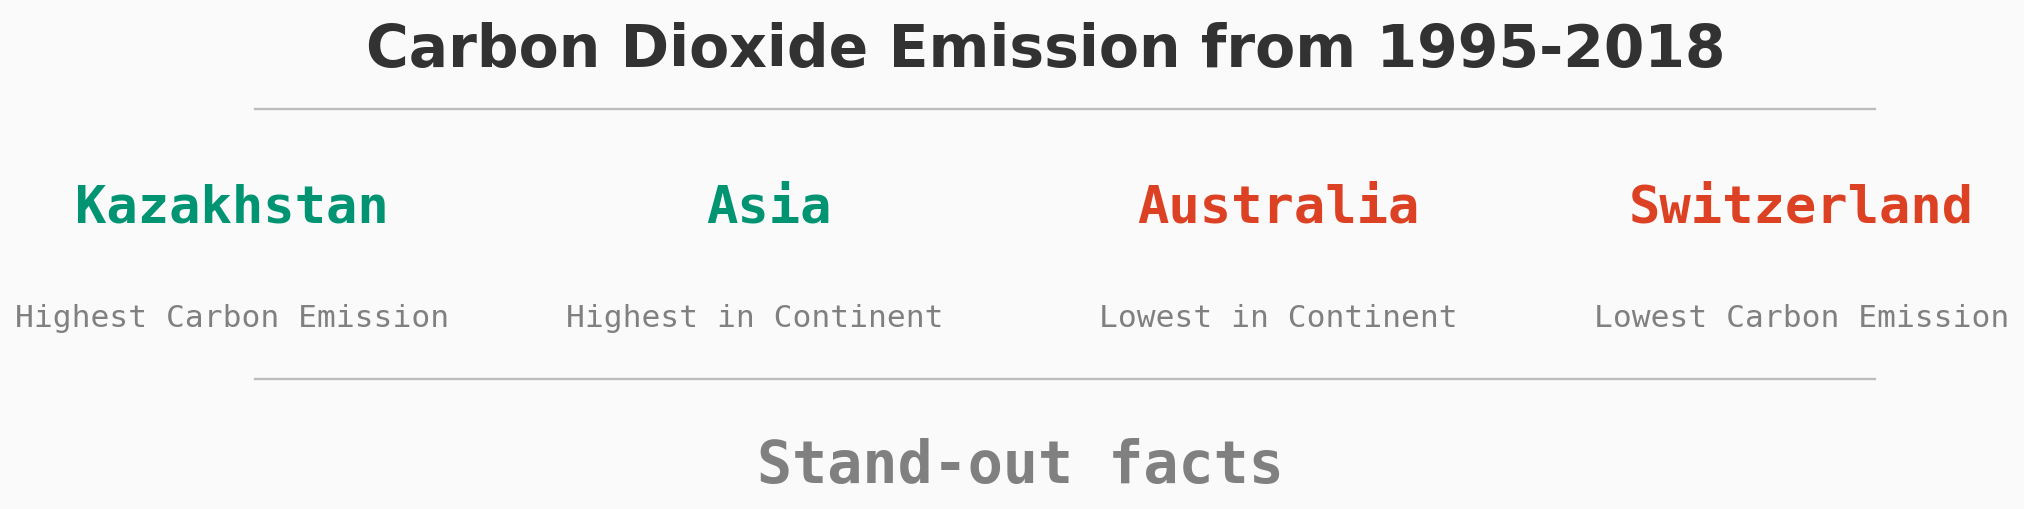

In [13]:
# inspiration ; https://www.kaggle.com/gaetanlopez/how-to-make-clean-visualizations
# changed code signif.

fig = plt.figure(figsize=(6,3),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.2, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(1.167,0.85,"Carbon Dioxide Emission from 1995-2018",color='#323232',fontsize=28, fontweight='bold', fontfamily='sanserif',ha='center')
ax0.text(1.13,-0.35,"Stand-out facts",color='gray',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,"Kazakhstan",color=high_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.1,"Highest Carbon Emission",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(0.77,0.4,"Asia",color=high_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.75,0.1,"Highest in Continent",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(1.5,0.4,"Australia",color=low_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.5,0.1,"Lowest in Continent",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(2.25,0.4,"Switzerland",color=low_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(2.25,0.1,"Lowest Carbon Emission",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.set_xticklabels('')
ax0.tick_params(axis='both',length=0)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)
    
import matplotlib.lines as lines
l1 = lines.Line2D([0.15, 1.95], [0.67, 0.67], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l1])
l2 = lines.Line2D([0.15, 1.95], [0.07, 0.07], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l2])
    
plt.show()

In [14]:
df2=df1.sort_values('Total',ascending=False) #sort the value

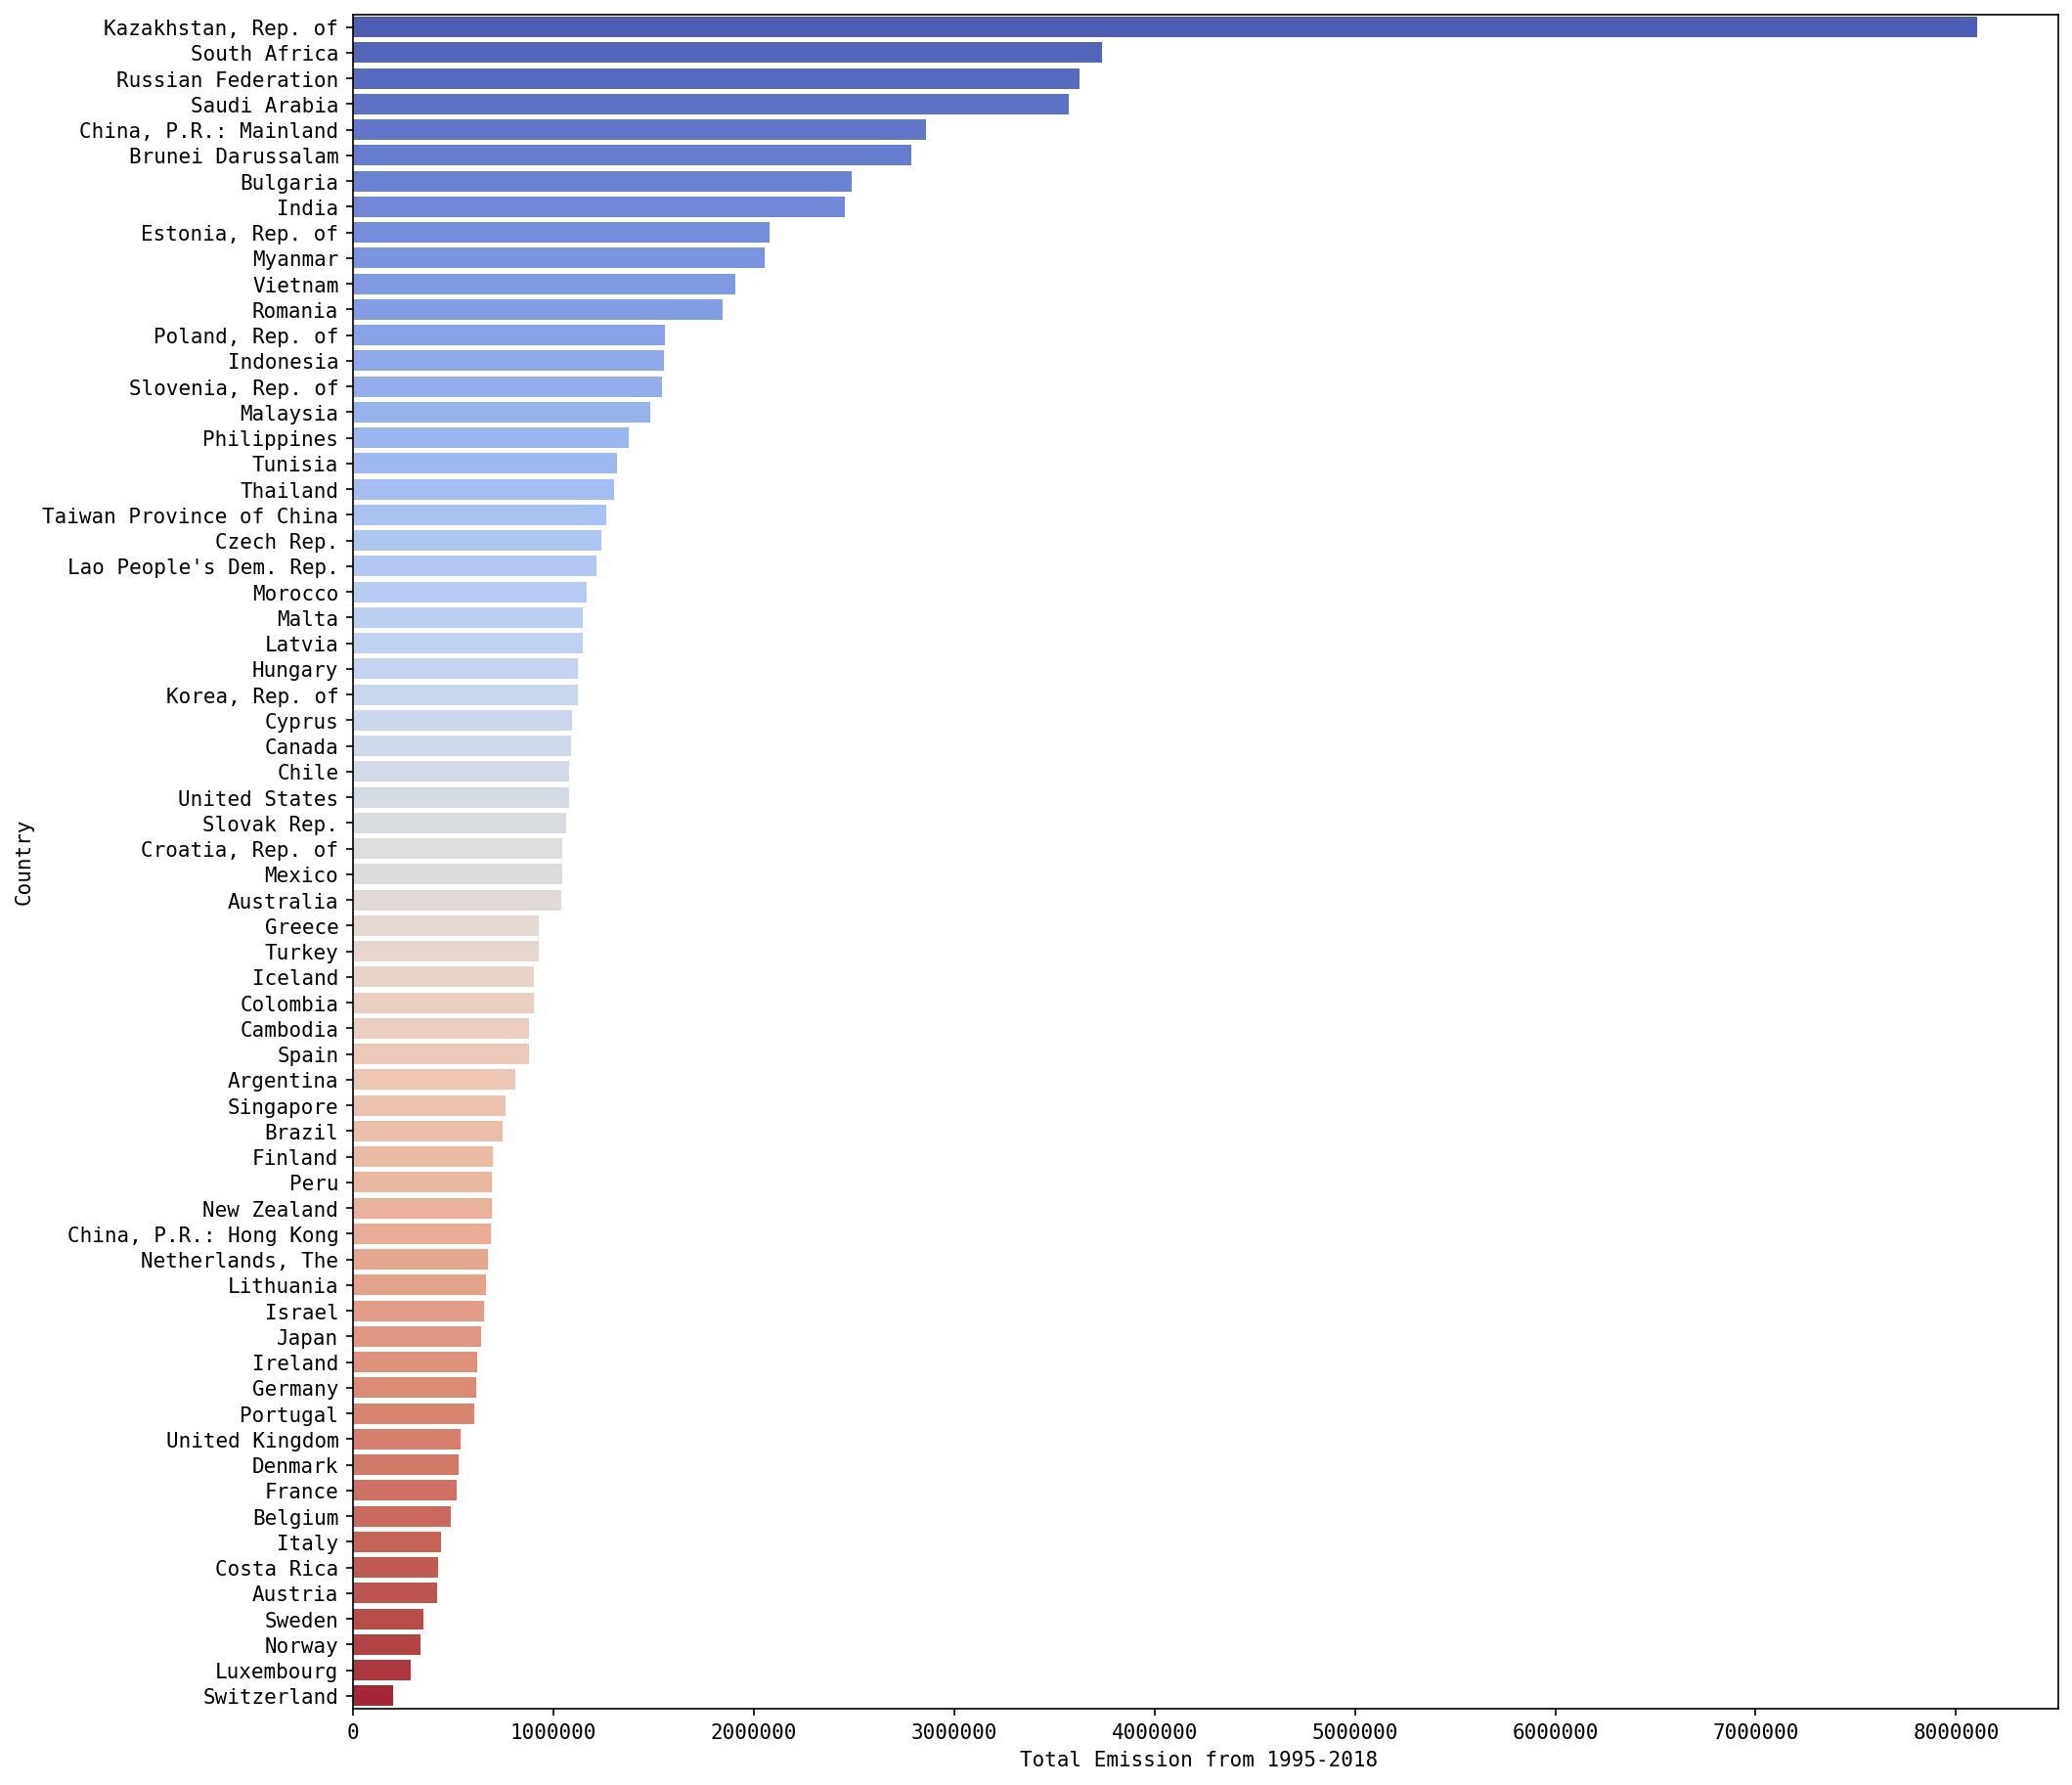

In [15]:
fig = plt.figure(figsize=(15,15),dpi=150)
sns.barplot(x = "Total", y = "Country", data=df2 ,palette="coolwarm")

plt.xlabel("Total Emission from 1995-2018 ")
plt.ylabel("Country")
plt.ticklabel_format(style='plain', axis='x')

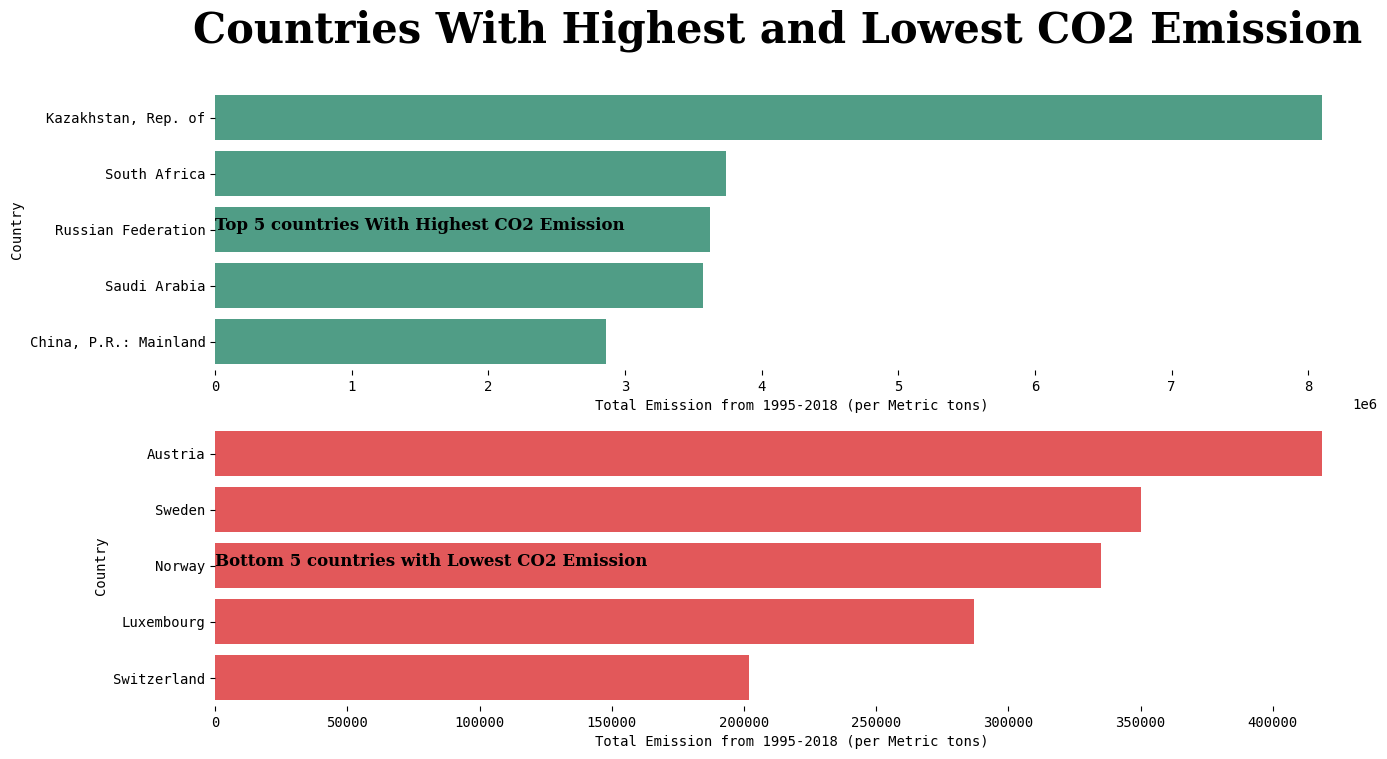

In [16]:
# Assuming 'df2' and 'color' are already defined

top5 = df2.head(5)
bot5 = df2.tail(5)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))  # Create figure and subplots

plt.suptitle("Countries With Highest and Lowest CO2 Emission",
             family='Serif', weight='bold', size=30)

ax1 = sns.barplot(data=top5, x=top5['Total'], y=top5['Country'], color=color[5], ax=ax1)
ax1.set_xlabel('Total Emission from 1995-2018 (per Metric tons) ')
ax1.xaxis.set_visible(True)
ax1.annotate("Top 5 countries With Highest CO2 Emission", xy=(18, 2),
             family='Serif', weight='bold', size=12)

ax2 = sns.barplot(data=bot5, x=bot5['Total'], y=bot5['Country'], color=color[0], ax=ax2)
ax2.annotate("Bottom 5 countries with Lowest CO2 Emission", xy=(8, 2),
             family='Serif', weight='bold', size=12)
ax2.set_xlabel('Total Emission from 1995-2018 (per Metric tons) ')
ax2.xaxis.set_visible(True)

# Remove spines for both axes at once
for s in ['left', 'right', 'top', 'bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

plt.show()  # Display the plot


In [17]:
df6=top5
del df6['Total']
dfm2 = df6.melt('Country', var_name='Year', value_name='Emission')

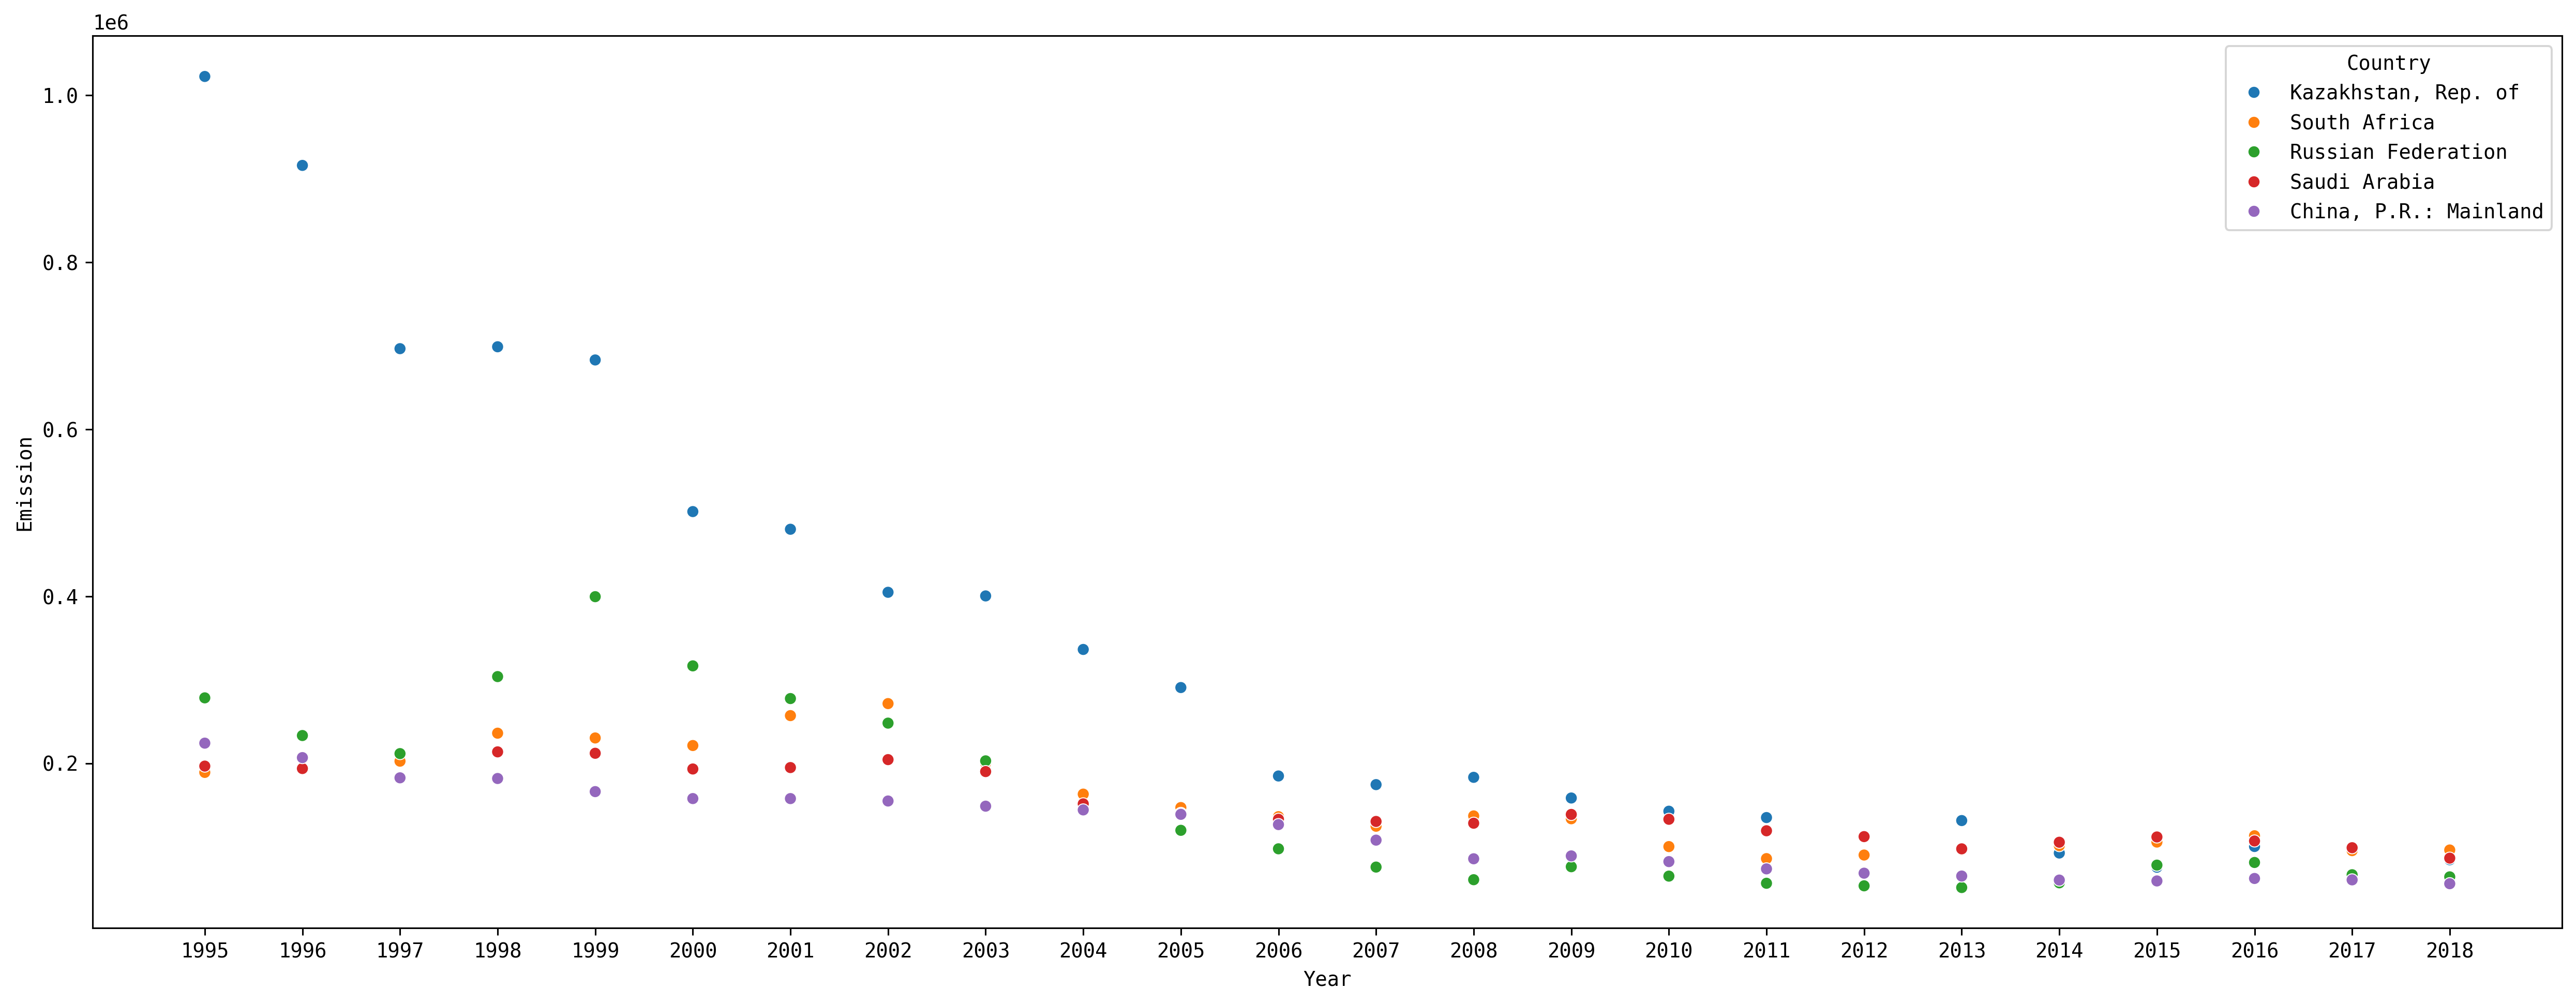

In [18]:
plt.figure(figsize=(22, 8), dpi=280)
g = sns.scatterplot(x="Year", y="Emission", hue='Country', data=dfm2)


In [19]:
px.box(data_frame=dfm2, x='Emission', y='Country', color='Country', title='Variation of Carbon Emission for Top 5 Countries')


In [20]:
dfm2['5years']=1

dfm2['5years'][dfm2['Year'].between('1995','2000')]='1995-2000'
dfm2['5years'][dfm2['Year'].between('2001','2005')]='2001-2005'
dfm2['5years'][dfm2['Year'].between('2006','2010')]='2006-2010'
dfm2['5years'][dfm2['Year'].between('2011','2015')]='2011-2015'
dfm2['5years'][dfm2['Year'].between('2016','2018')]='2016-2018'

In [21]:
px.box(data_frame=dfm2, x='Emission', y='Country', color='Country', title='Variation of Carbon Emission for 5years',facet_col='5years')

In [22]:
df3=df.groupby(['Country','ISO2']).sum().reset_index(drop=False)
df3.head(30)
df3=pd.merge(df3, df1, on='Country')

f = lambda x: pc.country_alpha2_to_continent_code(x)
df3['Continent'] = df3['ISO2'].apply(f)


name = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'}
df3['Continent'] = df3['Continent'].map(name)

In [23]:
top5.head()

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
31,"Kazakhstan, Rep. of",1022501.0,915997.0,696541.0,698809.0,683015.0,501442.0,480284.0,404794.0,400444.0,...,158452.0,142629.0,135027.0,111633.0,131435.0,92554.0,75563.0,100386.0,98068.0,84520.0
55,South Africa,189092.0,206024.0,202550.0,236064.0,230360.0,221289.0,257119.0,271510.0,200306.0,...,133608.0,100274.0,85869.0,90155.0,96493.0,101416.0,105673.0,113243.0,95438.0,96192.0
50,Russian Federation,278373.0,233256.0,211615.0,303847.0,399547.0,316686.0,277536.0,248123.0,202930.0,...,76168.0,64905.0,56341.0,53292.0,51244.0,56886.0,78066.0,81244.0,66561.0,64014.0
51,Saudi Arabia,196641.0,193740.0,182157.0,213698.0,212012.0,193197.0,194897.0,204415.0,190106.0,...,138768.0,132982.0,119210.0,112223.0,97564.0,105462.0,111785.0,106991.0,98917.0,86427.0
11,"China, P.R.: Mainland",224140.0,206817.0,182622.0,181806.0,166103.0,157773.0,157753.0,154860.0,148666.0,...,89099.0,82299.0,73591.0,68422.0,64992.0,60169.0,59126.0,62086.0,60427.0,55831.0


In [24]:
df4=df3.groupby(['Continent']).sum().reset_index(drop=False)
df4.head()

,Continent,Country,ISO2,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Industry,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,Africa,MoroccoSouth AfricaTunisia,MAZATN,CO2 emissionsCO2 emissionsCO2 emissionsCO2 emi...,Millions of Metric tons of CO2Millions of Metr...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCEC...,CO2 EmissionsCO2 EmissionsCO2 EmissionsCO2 Emi...,"Environment, Climate Change, Economic Activity...",Accomodation and food servicesActivities of ho...,...,178318.0,161010.0,169269.0,169381.0,177460.0,186485.0,194149.0,177931.0,174773.0,6225241.0
1,Asia,"Brunei DarussalamCambodiaChina, P.R.: Hong Kon...",BNKHHKCNCYINIDILJPKZKRLAMYMMPHSASGTWTHTRVN,CO2 emissionsCO2 emissionsCO2 emissionsCO2 emi...,Millions of Metric tons of CO2Millions of Metr...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCEC...,CO2 EmissionsCO2 EmissionsCO2 EmissionsCO2 Emi...,"Environment, Climate Change, Economic Activity...",Accomodation and food servicesActivities of ho...,...,1089972.0,983948.0,931577.0,923478.0,912934.0,975420.0,1023122.0,1006019.0,942321.0,38695960.0
2,Australia,AustraliaNew Zealand,AUNZ,CO2 emissionsCO2 emissionsCO2 emissionsCO2 emi...,Millions of Metric tons of CO2Millions of Metr...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCEC...,CO2 EmissionsCO2 EmissionsCO2 EmissionsCO2 Emi...,"Environment, Climate Change, Economic Activity...",Accomodation and food servicesActivities of ho...,...,49302.0,40069.0,38139.0,38368.0,38739.0,44772.0,45991.0,43428.0,41693.0,1732664.0
3,Europe,"AustriaBelgiumBulgariaCroatia, Rep. ofCzech Re...",ATBEBGHRCZDKEEFIFRDEGRHUISIEITLVLTLUMTNLNOPLPT...,CO2 emissionsCO2 emissionsCO2 emissionsCO2 emi...,Millions of Metric tons of CO2Millions of Metr...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCEC...,CO2 EmissionsCO2 EmissionsCO2 EmissionsCO2 Emi...,"Environment, Climate Change, Economic Activity...",Accomodation and food servicesActivities of ho...,...,723167.0,627118.0,662786.0,616099.0,596857.0,833128.0,1172296.0,838266.0,632600.0,30591999.0
4,North America,CanadaCosta RicaMexicoUnited States,CACRMXUS,CO2 emissionsCO2 emissionsCO2 emissionsCO2 emi...,Millions of Metric tons of CO2Millions of Metr...,"OECD (2021), OECD Inter-Country Input-Output D...",ECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCECNCEC...,CO2 EmissionsCO2 EmissionsCO2 EmissionsCO2 Emi...,"Environment, Climate Change, Economic Activity...",Accomodation and food servicesActivities of ho...,...,114735.0,107921.0,104697.0,103592.0,99202.0,109403.0,116494.0,105276.0,97102.0,3638611.0


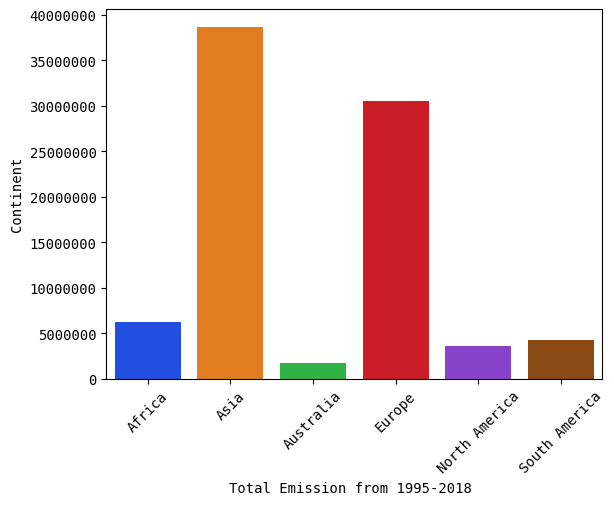

In [25]:
sns.barplot(x = "Continent", y = "Total", data=df4 ,palette="bright")

plt.xlabel("Total Emission from 1995-2018 ")
plt.ylabel("Continent")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')



•	We could see that the total carbon emission for the top 5 Countries decrease steadily from 1995-2018

•	The highest Carbon Emission comes from Asia and Europe
